In [1]:
import scipy
import numpy as np
import os
import matplotlib.pyplot as plt
from iglutils import *

root_folder = os.path.join(os.getcwd(), "ghcn_data")
root_folder

'/Users/Mart/Documents/EPFL/transphere/martino/ghcn_data'

# 1) GHCN

In [2]:
coords = create_GHCN(nstations = 500)

n_stations: 500, n_days: 1826


In [3]:
sphere = cotan(coords)

In [4]:
sphere.e(k=50)

In [5]:
sphere.plot_e(5)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0107486…

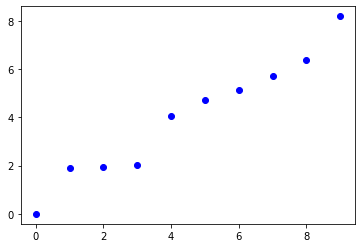

In [6]:
plt.plot(sphere.eig_values[:10], 'bo')

# 2) Cotan VS B&N

## 2.1) Equiangular

### 2.1.1) cotan

In [7]:
bw = 128
coords = create_equiangular(bw)

In [8]:
k = 50
sphere = cotan(coords)
sphere.e(k)

2019-12-09 16:10:57,802:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are negative edge weights.


In [9]:
sphere.plot_e(49)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

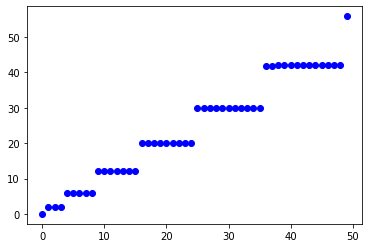

In [10]:
plt.plot(sphere.eig_values, 'bo')

### 2.1.2) B&N

In [11]:
sphere = SphereEquiangular(bw=64, dist='euclidean', neighbors=8)

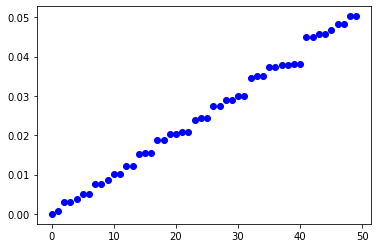

In [12]:
sphere.compute_fourier_basis(n_eigenvectors=50) 
plt.plot(sphere.e, 'bo')

## 2.2) HEALPix

### 2.2.1) cotan

In [13]:
coords = create_healpix()
k = 50
sphere = cotan(coords)
sphere.e(k)

2019-12-09 16:11:15,914:[WARNING](pygsp.graphs.graph.__init__): Adjacency: there are negative edge weights.


In [14]:
sphere.plot_e(45)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

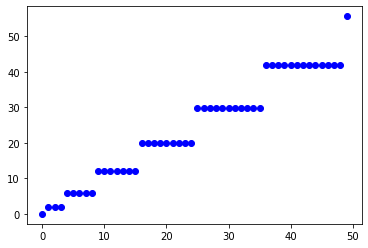

In [15]:
plt.plot(sphere.eig_values, 'bo')

### 2.2.2) B&N

In [16]:
from pygsp.graphs import SphereHealpix
sphere = SphereHealpix(nside=32, n_neighbors=8)

In [17]:
sphere.compute_fourier_basis(n_eigenvectors=50) 

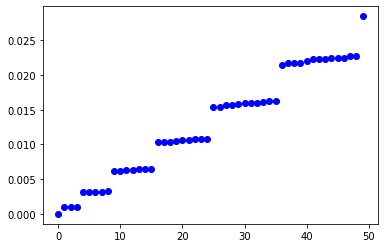

In [18]:
plt.plot(sphere.e, 'bo')